In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, auc, accuracy_score,  classification_report, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.calibration import calibration_curve

In [ ]:
df_sissi = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/SISSIz_Excel/sissi.xlsx"))
df_sissiz_mono = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/SISSIz_Excel/sissiz_mono.xlsx"))
df_sissiz_di = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/SISSIz_Excel/sissiz_di.xlsx"))
df_multiperm_mono = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/SISSIz_Excel/multiperm_mono.xlsx"))
df_multiperm_di = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/SISSIz_Excel/multiperm_di.xlsx"))
df_aln_shuffle = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/SISSIz_Excel/alifoldz.xlsx"))

In [ ]:
df_sissi.head(10)

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments.,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7. 8. and 9.,File
0,0.8786,0.8688,0.0045,0.5836,0.5137,-86.85,-6.30,3.80,-21.20,pos_sample_output_1.txt
1,0.8791,0.8706,0.0042,0.4948,0.4584,-70.37,-5.05,3.33,-19.62,pos_sample_output_10.txt
2,0.8723,0.8638,0.0043,0.5819,0.5153,-90.39,-5.80,3.31,-25.56,pos_sample_output_100.txt
3,0.8756,0.8650,0.0044,0.5443,0.5189,-86.89,-6.89,3.58,-22.36,pos_sample_output_101.txt
4,0.8811,0.8691,0.0041,0.5995,0.4652,-90.19,-6.19,3.27,-25.68,pos_sample_output_102.txt
5,0.8676,0.8590,0.0041,0.6273,0.4691,-90.84,-4.80,3.02,-28.54,pos_sample_output_103.txt
6,0.8821,0.8725,0.0047,0.5617,0.5106,-83.82,-5.58,3.19,-24.56,pos_sample_output_104.txt
7,0.8810,0.8723,0.0048,0.6147,0.4454,-83.58,-6.28,3.40,-22.73,pos_sample_output_105.txt
8,0.8751,0.8657,0.0044,0.6096,0.4780,-82.79,-5.63,3.48,-22.17,pos_sample_output_106.txt
9,0.8772,0.8685,0.0045,0.6351,0.5198,-98.81,-7.20,3.93,-23.30,pos_sample_output_107.txt


In [ ]:
df_sissi[['Mean Pairwise Identity (MPI) of the input alignment',
        'Average MPI of the sampled alignments.',
        'Standard deviation of the MPIs of the sampled alignments',
        'Structural Conservation Index (SCI)',	
        'GC-Content',
        'RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.',
        'Average consensus MFE in the sampled alignments',
        'Standard deviation of the consensus MFE in the sampled alignments',
        'z-score calculated from 7. 8. and 9.']].describe()

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments.,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7. 8. and 9.
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.872969,0.863353,0.004596,0.567310,0.484514,-82.343860,-5.537680,3.330700,-23.381200
std,0.007084,0.007399,0.000411,0.071259,0.026359,12.506553,1.473781,0.479526,4.126448
min,0.849600,0.840600,0.003400,0.371900,0.404300,-119.180000,-11.600000,1.870000,-37.480000
25%,0.868350,0.858675,0.004300,0.518100,0.465700,-90.375000,-6.360000,3.020000,-25.855000
50%,0.873450,0.863750,0.004600,0.571150,0.484600,-82.635000,-5.465000,3.320000,-23.060000
75%,0.877900,0.868500,0.004900,0.617125,0.502600,-73.685000,-4.500000,3.632500,-20.477500
max,0.891200,0.884100,0.005900,0.761200,0.567900,-47.310000,-2.180000,4.870000,-13.110000


In [ ]:
df_sissiz_mono.head(10)

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments.,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7. 8. and 9.,File
0,0.8690,0.8573,0.0043,0.0750,0.4536,-7.16,-6.83,4.04,-0.08,neg_sample_SISSIz_mono_output_1.txt
1,0.8691,0.8579,0.0037,0.0387,0.4432,-3.98,-6.87,3.40,0.85,neg_sample_SISSIz_mono_output_10.txt
2,0.8705,0.8585,0.0039,0.0468,0.4901,-5.28,-7.92,3.66,0.72,neg_sample_SISSIz_mono_output_100.txt
3,0.8705,0.8592,0.0042,0.0468,0.4901,-5.28,-7.37,3.61,0.58,neg_sample_SISSIz_mono_output_101.txt
4,0.8692,0.8579,0.0039,0.0139,0.4499,-1.30,-5.17,3.25,1.19,neg_sample_SISSIz_mono_output_102.txt
5,0.8692,0.8578,0.0033,0.0139,0.4499,-1.30,-5.55,3.68,1.16,neg_sample_SISSIz_mono_output_103.txt
6,0.8692,0.8593,0.0036,0.0139,0.4499,-1.30,-5.26,2.91,1.36,neg_sample_SISSIz_mono_output_104.txt
7,0.8692,0.8598,0.0043,0.0139,0.4499,-1.30,-5.95,3.02,1.54,neg_sample_SISSIz_mono_output_105.txt
8,0.8692,0.8574,0.0040,0.0139,0.4499,-1.30,-5.78,3.31,1.35,neg_sample_SISSIz_mono_output_106.txt
9,0.8692,0.8585,0.0037,0.0139,0.4499,-1.30,-5.74,3.10,1.43,neg_sample_SISSIz_mono_output_107.txt


In [ ]:
df_sissiz_mono[['Mean Pairwise Identity (MPI) of the input alignment',
        'Average MPI of the sampled alignments.',
        'Standard deviation of the MPIs of the sampled alignments',
        'Structural Conservation Index (SCI)',	
        'GC-Content',
        'RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.',
        'Average consensus MFE in the sampled alignments',
        'Standard deviation of the consensus MFE in the sampled alignments',
        'z-score calculated from 7. 8. and 9.']].describe()


# Example neg_sample_SISSIz_mono_output_60_175.txt
# z-score = (RNAalifold consensus Minimum Free Energy (MFE) of the original alignment - Average consensus MFE in the sampled alignments) / Standard deviation of the consensus MFE in the sampled alignments
# z-score = (-7.27 - -9.87) / 4.02 = 0,65

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments.,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7. 8. and 9.
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,0.868141,0.857538,0.004259,0.040765,0.458432,-4.20978,-7.011400,3.615840,0.779740
std,0.003696,0.003867,0.000352,0.029451,0.022297,3.01042,1.224306,0.374007,0.795141
min,0.861800,0.850000,0.003200,-0.000000,0.401100,-13.59000,-10.540000,2.630000,-2.110000
25%,0.865500,0.855075,0.004000,0.023200,0.442500,-6.07000,-7.855000,3.360000,0.337500
50%,0.867850,0.857200,0.004300,0.035900,0.457100,-3.52000,-6.965000,3.610000,0.860000
75%,0.870200,0.859900,0.004500,0.054900,0.468800,-2.52000,-6.075000,3.850000,1.380000
max,0.879300,0.870400,0.005300,0.131200,0.498300,0.00000,-4.150000,4.990000,2.300000


In [ ]:
df_sissiz_di.head(10)

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments.,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7. 8. and 9.,File
0,0.8659,0.8561,0.0043,0.0962,0.4840,-11.45,-8.85,3.68,-0.70,neg_sample_SISSIz_di_output_1.txt
1,0.8682,0.8557,0.0049,0.1017,0.5367,-13.15,-12.49,4.71,-0.14,neg_sample_SISSIz_di_output_10.txt
2,0.8688,0.8583,0.0047,0.1069,0.4675,-11.55,-9.89,5.59,-0.30,neg_sample_SISSIz_di_output_100.txt
3,0.8688,0.8580,0.0039,0.1069,0.4675,-11.55,-9.69,4.05,-0.46,neg_sample_SISSIz_di_output_101.txt
4,0.8688,0.8570,0.0041,0.1069,0.4675,-11.55,-10.29,4.28,-0.30,neg_sample_SISSIz_di_output_102.txt
5,0.8688,0.8579,0.0042,0.1069,0.4675,-11.55,-10.15,4.55,-0.31,neg_sample_SISSIz_di_output_103.txt
6,0.8688,0.8578,0.0041,0.1069,0.4675,-11.55,-10.75,4.48,-0.18,neg_sample_SISSIz_di_output_104.txt
7,0.8688,0.8579,0.0039,0.1069,0.4675,-11.55,-9.63,4.17,-0.46,neg_sample_SISSIz_di_output_105.txt
8,0.8707,0.8592,0.0040,0.0781,0.4138,-7.50,-7.11,3.80,-0.10,neg_sample_SISSIz_di_output_106.txt
9,0.8707,0.8595,0.0039,0.0781,0.4138,-7.50,-7.49,4.15,-0.00,neg_sample_SISSIz_di_output_107.txt


In [ ]:
df_sissiz_di[['Mean Pairwise Identity (MPI) of the input alignment',
        'Average MPI of the sampled alignments.',
        'Standard deviation of the MPIs of the sampled alignments',
        'Structural Conservation Index (SCI)',	
        'GC-Content',
        'RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.',
        'Average consensus MFE in the sampled alignments',
        'Standard deviation of the consensus MFE in the sampled alignments',
        'z-score calculated from 7. 8. and 9.']].describe()

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments.,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7. 8. and 9.
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.867564,0.856784,0.004233,0.058853,0.460655,-6.246780,-7.774680,3.860240,0.402940
std,0.004013,0.004166,0.000378,0.028956,0.023335,3.250954,1.694625,0.486631,0.698911
min,0.857800,0.846600,0.003100,-0.000000,0.403800,-15.790000,-12.860000,2.440000,-1.480000
25%,0.864400,0.853600,0.004000,0.038900,0.442500,-8.442500,-8.795000,3.540000,-0.090000
50%,0.867600,0.857000,0.004200,0.059700,0.463400,-6.350000,-7.815000,3.860000,0.440000
75%,0.870200,0.859900,0.004500,0.078200,0.476100,-3.780000,-6.587500,4.190000,0.872500
max,0.876000,0.866700,0.005400,0.137300,0.536700,0.000000,-2.930000,5.590000,2.030000


In [ ]:
df_multiperm_mono.head(10)

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments.,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7. 8. and 9.,File
0,0.8779,0.8676,0.0050,0.1445,0.46,-15.69,-5.17,2.85,-3.70,neg_sample_MULTIPERM_mono_output_1.txt
1,0.8779,0.8673,0.0044,0.1991,0.46,-20.89,-5.85,3.15,-4.78,neg_sample_MULTIPERM_mono_output_10.txt
2,0.8779,0.8674,0.0040,0.1401,0.46,-14.79,-6.58,3.72,-2.21,neg_sample_MULTIPERM_mono_output_100.txt
3,0.8779,0.8676,0.0041,0.1557,0.46,-16.54,-5.49,3.22,-3.44,neg_sample_MULTIPERM_mono_output_101.txt
4,0.8779,0.8670,0.0045,0.2826,0.46,-29.35,-5.35,3.17,-7.57,neg_sample_MULTIPERM_mono_output_102.txt
5,0.8779,0.8668,0.0047,0.1860,0.46,-18.94,-5.88,3.26,-4.01,neg_sample_MULTIPERM_mono_output_103.txt
6,0.8779,0.8672,0.0043,0.1488,0.46,-15.59,-5.12,3.10,-3.38,neg_sample_MULTIPERM_mono_output_104.txt
7,0.8779,0.8663,0.0043,0.1047,0.46,-11.11,-4.96,2.75,-2.24,neg_sample_MULTIPERM_mono_output_105.txt
8,0.8779,0.8661,0.0053,0.1733,0.46,-19.06,-5.28,3.60,-3.83,neg_sample_MULTIPERM_mono_output_106.txt
9,0.8779,0.8665,0.0047,0.1680,0.46,-18.95,-5.11,3.23,-4.28,neg_sample_MULTIPERM_mono_output_107.txt


In [ ]:
df_multiperm_mono[['Mean Pairwise Identity (MPI) of the input alignment',
        'Average MPI of the sampled alignments.',
        'Standard deviation of the MPIs of the sampled alignments',
        'Structural Conservation Index (SCI)',	
        'GC-Content',
        'RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.',
        'Average consensus MFE in the sampled alignments',
        'Standard deviation of the consensus MFE in the sampled alignments',
        'z-score calculated from 7. 8. and 9.']].describe()

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments.,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7. 8. and 9.
count,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.000000,500.000000
mean,8.779000e-01,0.867091,0.004551,0.174209,4.600000e-01,-18.403040,-5.629380,3.394160,-3.792300
std,7.112543e-15,0.000828,0.000325,0.036227,1.944836e-15,3.871219,0.559356,0.302999,1.187843
min,8.779000e-01,0.864300,0.003700,0.072400,4.600000e-01,-30.340000,-7.480000,2.640000,-7.570000
25%,8.779000e-01,0.866500,0.004300,0.147475,4.600000e-01,-20.902500,-6.010000,3.190000,-4.572500
50%,8.779000e-01,0.867100,0.004500,0.171150,4.600000e-01,-18.150000,-5.590000,3.360000,-3.720000
75%,8.779000e-01,0.867600,0.004800,0.196325,4.600000e-01,-15.650000,-5.227500,3.580000,-2.950000
max,8.779000e-01,0.869500,0.005500,0.294400,4.600000e-01,-7.550000,-3.600000,4.570000,-0.500000


In [ ]:
df_multiperm_di.head(10)

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments.,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7. 8. and 9.,File
0,0.8779,0.8681,0.0042,0.1719,0.46,-17.57,-5.50,3.22,-3.75,neg_sample_MULTIPERM_di_output_1.txt
1,0.8779,0.8676,0.0046,0.1699,0.46,-17.84,-4.94,2.89,-4.46,neg_sample_MULTIPERM_di_output_10.txt
2,0.8779,0.8663,0.0050,0.1758,0.46,-18.67,-4.69,3.29,-4.25,neg_sample_MULTIPERM_di_output_100.txt
3,0.8779,0.8673,0.0054,0.1626,0.46,-16.92,-5.07,3.14,-3.78,neg_sample_MULTIPERM_di_output_101.txt
4,0.8779,0.8660,0.0051,0.1282,0.46,-13.19,-3.74,3.15,-2.99,neg_sample_MULTIPERM_di_output_102.txt
5,0.8779,0.8675,0.0045,0.1534,0.46,-16.09,-5.17,3.26,-3.35,neg_sample_MULTIPERM_di_output_103.txt
6,0.8779,0.8688,0.0045,0.1390,0.46,-14.78,-5.77,3.42,-2.64,neg_sample_MULTIPERM_di_output_104.txt
7,0.8779,0.8651,0.0049,0.1244,0.46,-13.39,-4.92,3.02,-2.80,neg_sample_MULTIPERM_di_output_105.txt
8,0.8779,0.8659,0.0042,0.2066,0.46,-22.32,-7.13,4.30,-3.53,neg_sample_MULTIPERM_di_output_106.txt
9,0.8779,0.8674,0.0045,0.1881,0.46,-18.98,-5.57,3.34,-4.02,neg_sample_MULTIPERM_di_output_107.txt


In [ ]:
df_multiperm_di[['Mean Pairwise Identity (MPI) of the input alignment',
        'Average MPI of the sampled alignments.',
        'Standard deviation of the MPIs of the sampled alignments',
        'Structural Conservation Index (SCI)',	
        'GC-Content',
        'RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.',
        'Average consensus MFE in the sampled alignments',
        'Standard deviation of the consensus MFE in the sampled alignments',
        'z-score calculated from 7. 8. and 9.']].describe()

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments.,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7. 8. and 9.
count,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.000000,500.000000
mean,8.779000e-01,0.867064,0.004553,0.169937,4.600000e-01,-17.839980,-5.129840,3.234920,-3.976620
std,7.112543e-15,0.000844,0.000324,0.035446,1.944836e-15,3.805142,0.527007,0.306262,1.281845
min,8.779000e-01,0.864600,0.003700,0.080900,4.600000e-01,-30.530000,-7.130000,2.430000,-7.940000
25%,8.779000e-01,0.866500,0.004300,0.144600,4.600000e-01,-20.325000,-5.432500,3.030000,-4.740000
50%,8.779000e-01,0.867100,0.004500,0.169250,4.600000e-01,-17.915000,-5.060000,3.220000,-3.870000
75%,8.779000e-01,0.867700,0.004800,0.191800,4.600000e-01,-15.007500,-4.787500,3.420000,-3.097500
max,8.779000e-01,0.869300,0.005700,0.284400,4.600000e-01,-8.480000,-3.740000,4.300000,-0.960000


In [ ]:
df_aln_shuffle.head(10)

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments.,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7. 8. and 9.,File
0,0.8779,0.8671,0.0047,0.4115,0.46,-45.43,-6.56,3.76,-10.34,neg_sample_ALIFOLDz_output_1.txt
1,0.8779,0.8669,0.0044,0.3690,0.46,-40.56,-7.12,3.71,-9.01,neg_sample_ALIFOLDz_output_10.txt
2,0.8779,0.8671,0.0045,0.3606,0.46,-39.70,-5.82,3.23,-10.48,neg_sample_ALIFOLDz_output_100.txt
3,0.8779,0.8674,0.0045,0.3481,0.46,-39.54,-6.86,3.66,-8.92,neg_sample_ALIFOLDz_output_101.txt
4,0.8779,0.8677,0.0044,0.3990,0.46,-44.79,-5.74,3.25,-12.02,neg_sample_ALIFOLDz_output_102.txt
5,0.8779,0.8677,0.0045,0.3773,0.46,-41.52,-6.69,3.83,-9.10,neg_sample_ALIFOLDz_output_103.txt
6,0.8779,0.8666,0.0042,0.2311,0.46,-24.48,-5.71,3.41,-5.50,neg_sample_ALIFOLDz_output_104.txt
7,0.8779,0.8679,0.0048,0.4301,0.46,-48.75,-6.23,3.92,-10.86,neg_sample_ALIFOLDz_output_105.txt
8,0.8779,0.8672,0.0048,0.4646,0.46,-52.96,-8.02,4.81,-9.35,neg_sample_ALIFOLDz_output_106.txt
9,0.8779,0.8662,0.0043,0.2959,0.46,-32.53,-6.82,3.53,-7.28,neg_sample_ALIFOLDz_output_107.txt


In [ ]:
df_aln_shuffle[['Mean Pairwise Identity (MPI) of the input alignment',
        'Average MPI of the sampled alignments.',
        'Standard deviation of the MPIs of the sampled alignments',
        'Structural Conservation Index (SCI)',	
        'GC-Content',
        'RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.',
        'Average consensus MFE in the sampled alignments',
        'Standard deviation of the consensus MFE in the sampled alignments',
        'z-score calculated from 7. 8. and 9.']].describe()

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments.,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7. 8. and 9.
count,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.00000,500.000000,500.000000,500.000000
mean,8.779000e-01,0.867060,0.004555,0.370494,4.600000e-01,-41.00926,-6.275380,3.558700,-9.837940
std,7.112543e-15,0.000811,0.000325,0.050968,1.944836e-15,6.46067,0.593209,0.320443,2.057474
min,8.779000e-01,0.864600,0.003700,0.231100,4.600000e-01,-62.11000,-8.150000,2.670000,-18.300000
25%,8.779000e-01,0.866600,0.004300,0.335875,4.600000e-01,-45.40250,-6.630000,3.320000,-10.970000
50%,8.779000e-01,0.867000,0.004500,0.367350,4.600000e-01,-40.54000,-6.230000,3.540000,-9.470000
75%,8.779000e-01,0.867600,0.004800,0.406925,4.600000e-01,-36.32750,-5.860000,3.780000,-8.397500
max,8.779000e-01,0.869800,0.005700,0.502700,4.600000e-01,-24.48000,-4.770000,4.810000,-5.270000


## Mean Pairwise Identity (MPI) of the input alignment

C:\Users\stefanre\AppData\Local\Temp\ipykernel_275860\1437701190.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


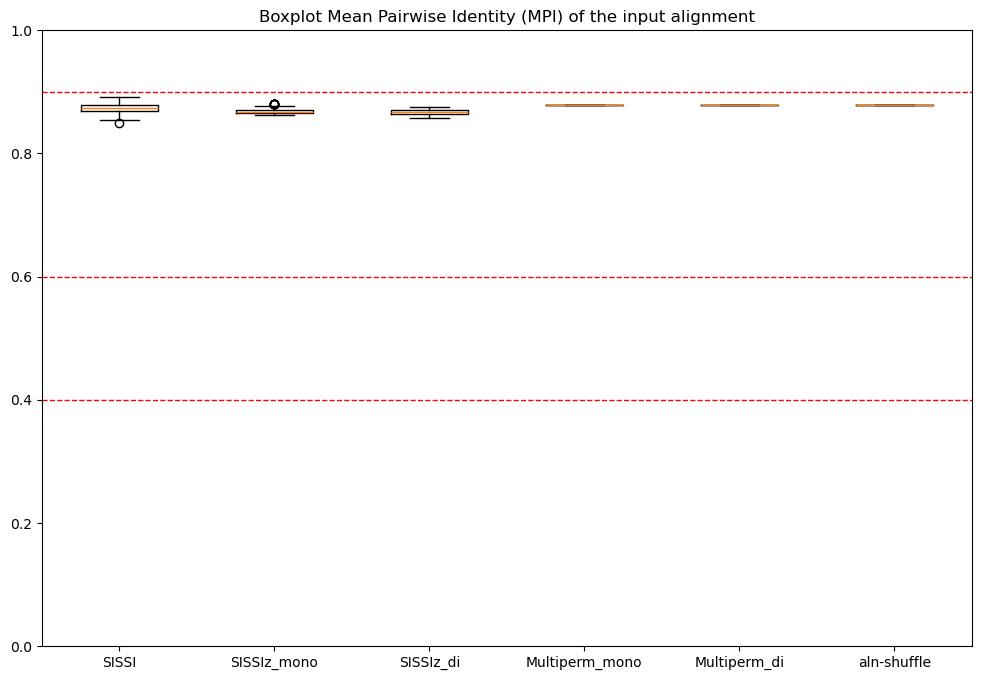

In [ ]:
dataframes = [df_sissi, df_sissiz_mono, df_sissiz_di, df_multiperm_mono, df_multiperm_di, df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['Mean Pairwise Identity (MPI) of the input alignment'] for df in dataframes]
thresholds = [0.40, 0.60, 0.90]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1, label=f'Threshold {t}')

plt.ylim(0.0, 1.0)
plt.title('Boxplot Mean Pairwise Identity (MPI) of the input alignment')
plt.show()

## Average MPI of the sampled alignments.

C:\Users\stefanre\AppData\Local\Temp\ipykernel_275860\1318570128.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


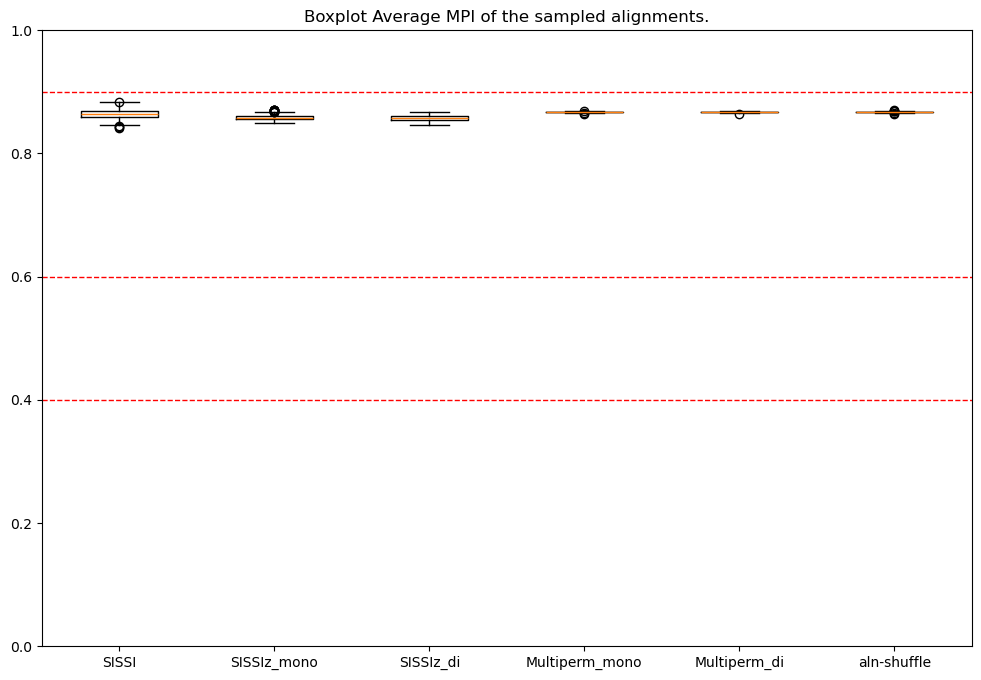

In [ ]:
dataframes = [df_sissi, df_sissiz_mono, df_sissiz_di, df_multiperm_mono, df_multiperm_di, df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['Average MPI of the sampled alignments.'] for df in dataframes]
thresholds = [0.40, 0.60, 0.90]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1, label=f'Threshold {t}')

plt.ylim(0.0, 1.0)
plt.title('Boxplot Average MPI of the sampled alignments.')
plt.show()

## Standard deviation of the MPIs of the sampled alignments

C:\Users\stefanre\AppData\Local\Temp\ipykernel_275860\4121038437.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


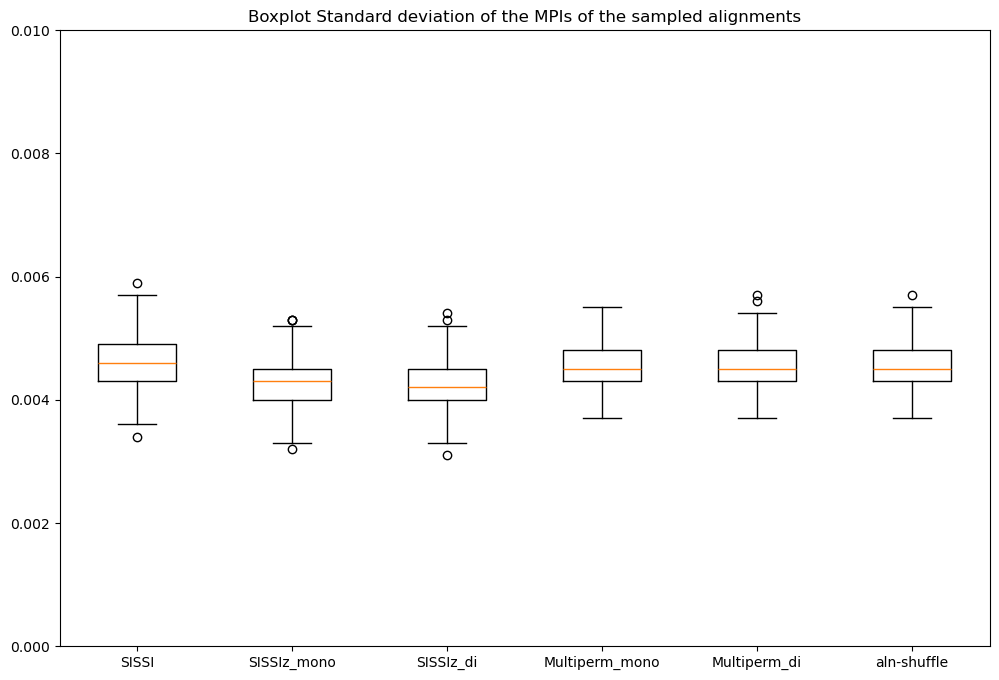

In [ ]:
dataframes = [df_sissi, df_sissiz_mono, df_sissiz_di, df_multiperm_mono, df_multiperm_di, df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['Standard deviation of the MPIs of the sampled alignments'] for df in dataframes]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1, label=f'Threshold {t}')

plt.ylim(0.0, 0.01)
plt.title('Boxplot Standard deviation of the MPIs of the sampled alignments')
plt.show()

## Structural Conservation Index (SCI)

C:\Users\stefanre\AppData\Local\Temp\ipykernel_275860\1306523587.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


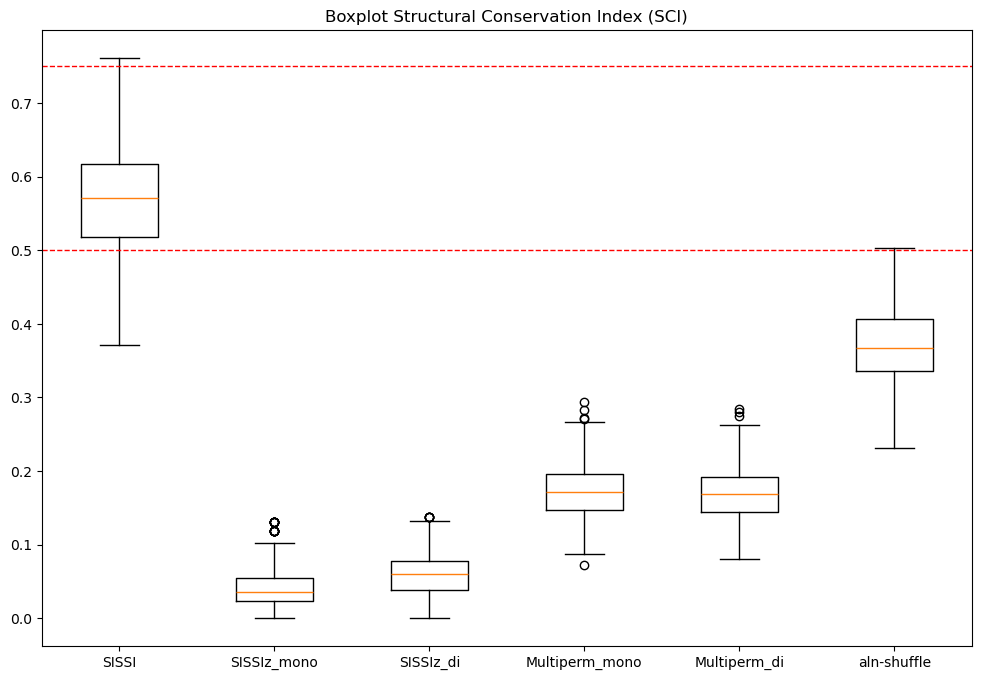

In [ ]:
dataframes = [df_sissi, df_sissiz_mono, df_sissiz_di, df_multiperm_mono, df_multiperm_di, df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['Structural Conservation Index (SCI)'] for df in dataframes]
thresholds = [0.5, 0.75]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1, label=f'Threshold {t}')

plt.title('Boxplot Structural Conservation Index (SCI)')
plt.show()

## GC-Content

C:\Users\stefanre\AppData\Local\Temp\ipykernel_275860\3074007515.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


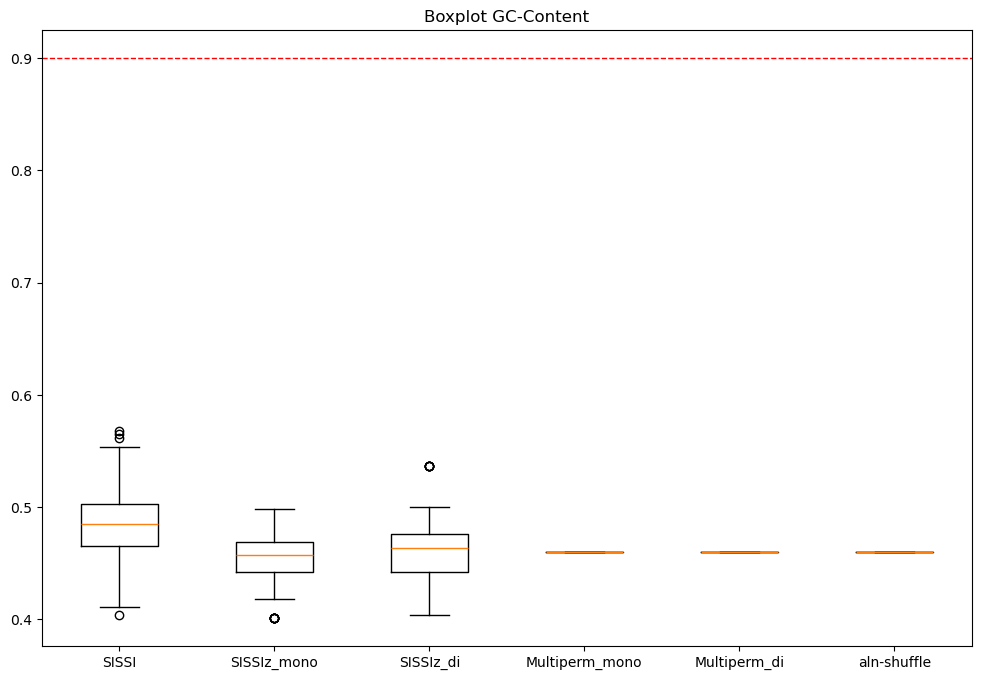

In [ ]:
dataframes = [df_sissi, df_sissiz_mono, df_sissiz_di, df_multiperm_mono, df_multiperm_di, df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['GC-Content'] for df in dataframes]
thresholds = [0.9]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1, label=f'Threshold {t}')

plt.title('Boxplot GC-Content')
plt.show()

## RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.

C:\Users\stefanre\AppData\Local\Temp\ipykernel_275860\45866791.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


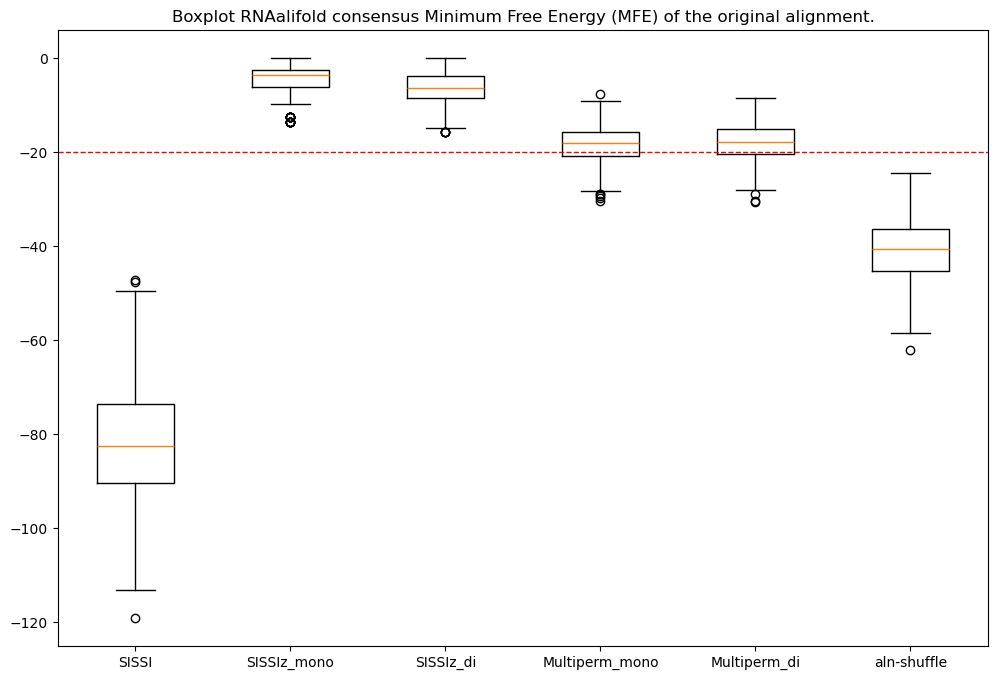

In [ ]:
dataframes = [df_sissi, df_sissiz_mono, df_sissiz_di, df_multiperm_mono, df_multiperm_di, df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.'] for df in dataframes]
thresholds = [-20]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1, label=f'Threshold {t}')

plt.title('Boxplot RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.')
plt.show()

## Average consensus MFE in the sampled alignments

C:\Users\stefanre\AppData\Local\Temp\ipykernel_275860\2536993985.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


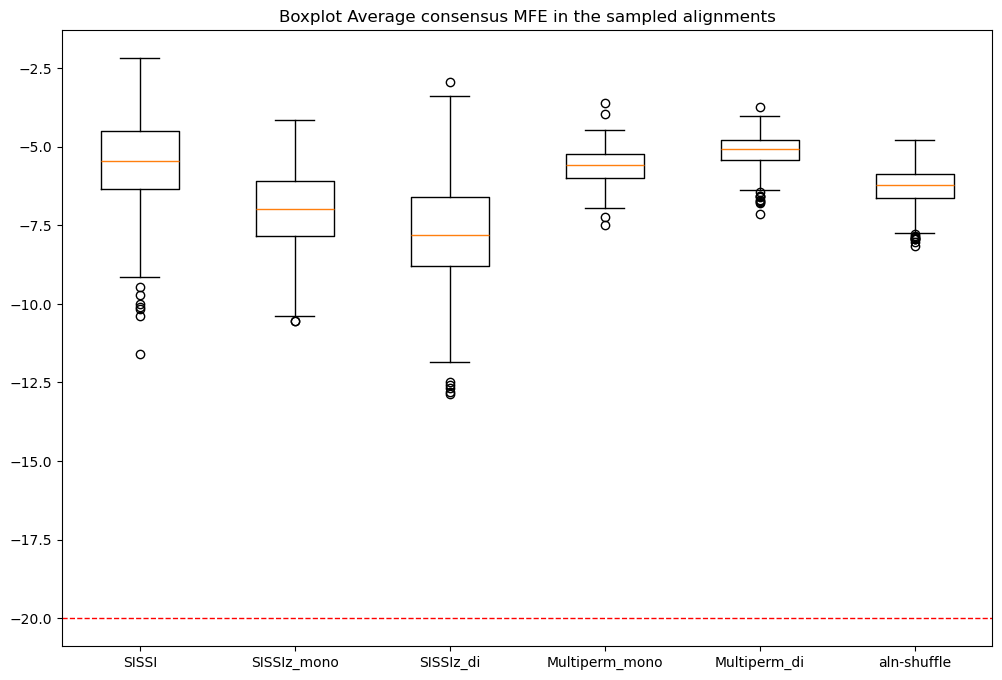

In [ ]:
dataframes = [df_sissi, df_sissiz_mono, df_sissiz_di, df_multiperm_mono, df_multiperm_di, df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['Average consensus MFE in the sampled alignments'] for df in dataframes]
thresholds = [-20]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1, label=f'Threshold {t}')

plt.title('Boxplot Average consensus MFE in the sampled alignments')
plt.show()

## Standard deviation of the consensus MFE in the sampled alignments

C:\Users\stefanre\AppData\Local\Temp\ipykernel_275860\3641649075.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


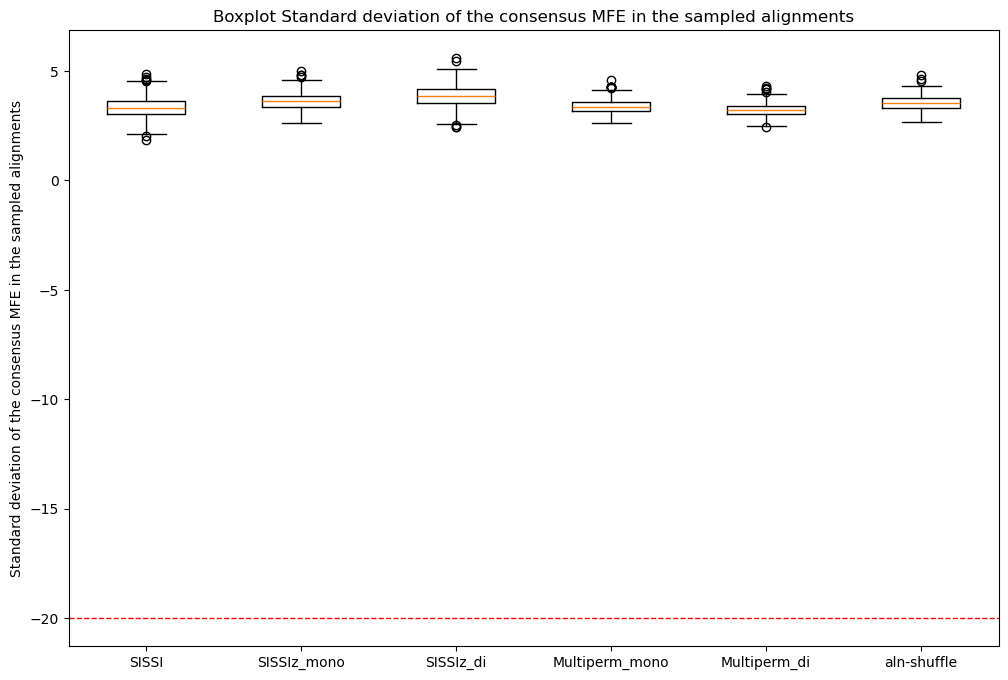

In [ ]:
dataframes = [df_sissi, df_sissiz_mono, df_sissiz_di, df_multiperm_mono, df_multiperm_di, df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['Standard deviation of the consensus MFE in the sampled alignments'] for df in dataframes]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1, label=f'Threshold {t}')

plt.title('Boxplot Standard deviation of the consensus MFE in the sampled alignments')
plt.ylabel('Standard deviation of the consensus MFE in the sampled alignments')
plt.show()

## z-score 

C:\Users\stefanre\AppData\Local\Temp\ipykernel_275860\2957777788.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)
C:\Users\stefanre\AppData\Local\Temp\ipykernel_275860\2957777788.py:12: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
C:\Users\stefanre\AppData\Local\Temp\ipykernel_275860\2957777788.py:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
C:\Users\stefanre\AppData\Local\Temp\ipykernel_275860\2957777788.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color=

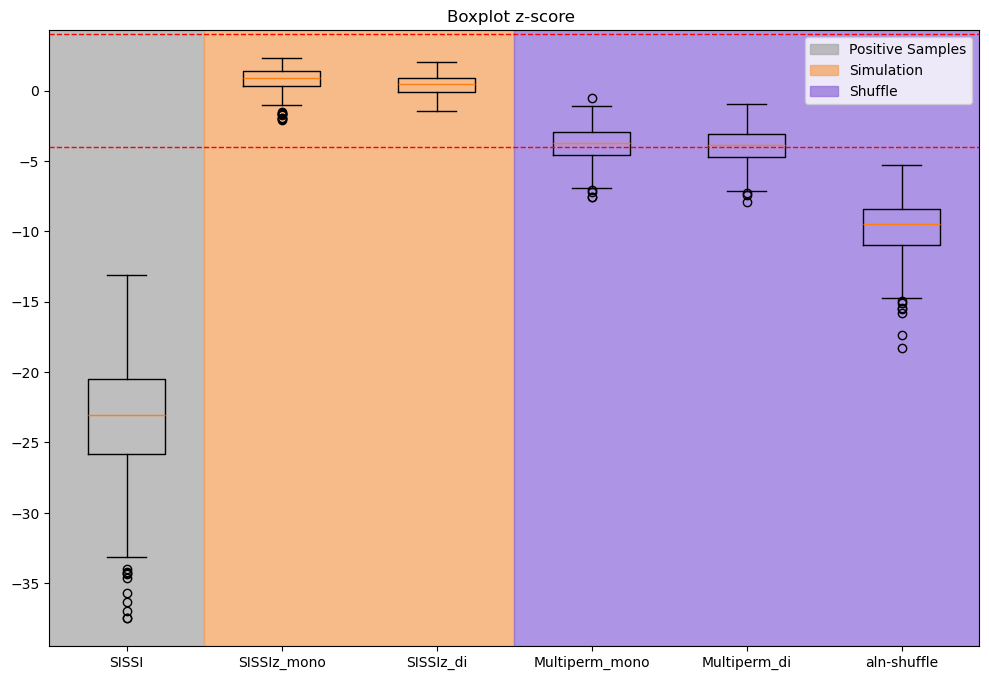

In [ ]:
dataframes = [df_sissi, df_sissiz_mono, df_sissiz_di, df_multiperm_mono, df_multiperm_di, df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['z-score calculated from 7. 8. and 9.'] for df in dataframes]
thresholds = [-4, 4]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1)

plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')

plt.title('Boxplot z-score ')
plt.legend()
plt.show()